In [1]:
import os

# change working directory, run this cell once
os.chdir("../")

In this notebook, we will demonstrate an example on how to use the ``AutoCluster`` class for clustering.

### Import packages

In [2]:
# we will be using sample datasets in sklearn
from sklearn import datasets
import pandas as pd

# autocluster functionalities
from autocluster import AutoCluster
from evaluators import get_evaluator
from utils.metafeatures import MetafeatureMapper

%load_ext autoreload
%autoreload 2

### Load sklearn digits dataset

In [6]:
digits_df = pd.DataFrame(datasets.load_digits()['data'])
digits_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


- Note that we are converting the dataset from ``numpy`` format to ``pandas DataFrame`` format. 
- This is because the ``AutoCluster.fit()`` function only accepts ``DataFrame`` format as input.
- There are 64 columns in this dataset, named ``0``, ``1``, ``2`` ... and so on. 

In [7]:
print("Shape of this dataframe is {}".format(digits_df.shape))

Shape of this dataframe is (1797, 64)


### Finding an optimal clustering model using random optimization

In [8]:
cluster = AutoCluster()
fit_params = {
    "df": digits_df, 
    "cluster_alg_ls": [
        'KMeans', 'GaussianMixture', 'Birch', 
        'MiniBatchKMeans', 'AgglomerativeClustering', 'OPTICS', 
        'SpectralClustering', 'DBSCAN', 'AffinityPropagation', 'MeanShift'
    ], 
    "dim_reduction_alg_ls": [
        'TSNE', 'PCA', 'IncrementalPCA', 
        'KernelPCA', 'FastICA', 'TruncatedSVD', 'NullModel'
    ],
    "optimizer": 'random',
    "n_evaluations": 50,
    "run_obj": 'quality',
    "seed": 27,
    "cutoff_time": 10,
    "preprocess_dict": {
        "numeric_cols": list(range(64)),
        "categorical_cols": [],
        "ordinal_cols": [],
        "y_col": []
    },
    "evaluator": get_evaluator(evaluator_ls = ['silhouetteScore'], 
                               weights = [], clustering_num = None, 
                               min_proportion = .05),
    "n_folds": 3,
    "warmstart": False
}
result_dict = cluster.fit(**fit_params)

1403/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1

/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (53) by Birch is less than (60). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: 0.4171966218849997
Fitting configuration: 
{'whiten___PCA': True, 'covariance_type___GaussianMixture': 'full', 'warm_start___GaussianMixture': True, 'clustering_choice': 'GaussianMixture', 'n_components___PCA': 3, 'dim_reduction_choice': 'PCA', 'init_params___GaussianMixture': 'random', 'svd_solver___PCA': 'randomized', 'n_components___GaussianMixture': 41}
Score obtained by this configuration: inf
Fitting configuration: 
{'fun___FastICA': 'logcosh', 'n_components___FastICA': 3, 'linkage___AgglomerativeClustering': 'single', 'affinity___AgglomerativeClustering': 'l2', 'clustering_choice': 'AgglomerativeClustering', 'algorithm___FastICA': 'parallel', 'dim_reduction_choice': 'FastICA', 'n_clusters___AgglomerativeClustering': 51}
Score obtained by this configuration: inf
Fitting configuration: 
{'n_clusters___SpectralClustering': 4, 'affinity___SpectralClustering': 'sigmoid', 'assign_labels___SpectralClustering': 'discretize', 'clustering_choice': 'Sp

/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/scipy/sparse/csgraph/_laplacian.py:120: RuntimeWarning: invalid value encountered in sqrt
  w = np.where(isolated_node_mask, 1, np.sqrt(w))


array must not contain infs or NaNs
Fitting configuration: 
{'whiten___PCA': True, 'batch_size___MiniBatchKMeans': 466, 'n_clusters___MiniBatchKMeans': 32, 'clustering_choice': 'MiniBatchKMeans', 'n_components___PCA': 3, 'dim_reduction_choice': 'PCA', 'svd_solver___PCA': 'randomized'}
Score obtained by this configuration: inf
Fitting configuration: 
{'batch_size___MiniBatchKMeans': 714, 'n_clusters___MiniBatchKMeans': 47, 'algorithm___TruncatedSVD': 'arpack', 'n_components___TruncatedSVD': 3, 'clustering_choice': 'MiniBatchKMeans', 'dim_reduction_choice': 'TruncatedSVD'}
Score obtained by this configuration: inf
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 11, 'dim_reduction_choice': 'NullModel'}
Score obtained by this configuration: inf
Fitting configuration: 
{'n_components___KernelPCA': 6, 'kernel___KernelPCA': 'sigmoid', 'min_samples___OPTICS': 639, 'cluster_method___OPTICS': 'dbscan', 'clustering_choice': 'OPTICS', 'metric___OPTICS': 'euclidean', 

/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Score obtained by this configuration: inf
Fitting configuration: 
{'eps___DBSCAN': 1.839773496082048, 'clustering_choice': 'DBSCAN', 'n_components___PCA': 2, 'min_samples___DBSCAN': 6, 'dim_reduction_choice': 'PCA', 'svd_solver___PCA': 'auto'}
Score obtained by this configuration: inf
Fitting configuration: 
{'clustering_choice': 'Birch', 'n_clusters___Birch': 70, 'branching_factor___Birch': 194, 'dim_reduction_choice': 'NullModel'}
Score obtained by this configuration: inf
Fitting configuration: 
{'eps___DBSCAN': 0.5626912710483656, 'algorithm___TruncatedSVD': 'arpack', 'n_components___TruncatedSVD': 5, 'clustering_choice': 'DBSCAN', 'min_samples___DBSCAN': 38, 'dim_reduction_choice': 'TruncatedSVD'}
Score obtained by this configuration: inf
Fitting configuration: 
{'fun___FastICA': 'cube', 'n_components___FastICA': 2, 'whiten___FastICA': True, 'clustering_choice': 'AffinityPropagation', 'damping___AffinityPropagation': 0.570242984775358, 'algorithm___FastICA': 'parallel', 'dim_reduct

performing TSNE


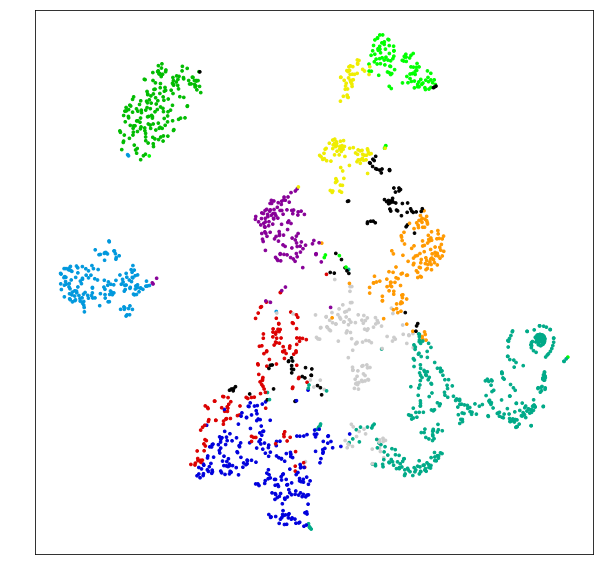

In [6]:
predictions = cluster.predict(digits_df)